# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# IMPORTING DATASET

In [2]:
df = pd.read_csv(r'C:\Users\Zoe\AppData\Local\Temp\Temp1_archive (1).zip\netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# CONDUCTING EDA ON :
- Understanding what content is available in different countries
- Identifying similar content by matching text-based features
- Network analysis of Actors / Directors and find interesting insights
- Is Netflix has increasingly focusing on TV rather than movies in recent years.
- Addtional insights

# DESCRIPTION OF THE DATASET

In [3]:
#checking missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


['director', 'cast', 'country', 'date_added', 'rating'] - These are the fpllowing columns which contains missing values

'director', 'cast', 'rating', 'date_added', 'country ' . These following columns contains missing values

In [4]:
for i in df.columns:
    count = df[i].isna().sum()
    if count > 0:
        print("missing value of {} column : {}".format(i, count))

missing value of director column : 2389
missing value of cast column : 718
missing value of country column : 507
missing value of date_added column : 10
missing value of rating column : 7


In [5]:
print(df['country'].mode()) 

#filling United States

df['country'].fillna('United States', inplace = True)

0    United States
dtype: object


In [6]:
#rating
print(df.rating.mode())
# TV- MA is the most repetitive.
df['rating'].fillna('TV-MA', inplace = True)

0    TV-MA
dtype: object


In [7]:
#DROPPING THOSE VALUES WHERE DATE_ADDED IS MISSING
df.dropna(subset=['date_added'], inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      5398 non-null   object
 4   cast          7059 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


In [9]:
#seperating cast and director column, which will be working on it later
v = df[['cast', 'director']]
v

,cast,director
0,"João Miguel, Bianca Comparato, Michel Gomes, R...",NaN
1,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Jorge Michel Grau
2,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Gilbert Chan
3,"Elijah Wood, John C. Reilly, Jennifer Connelly...",Shane Acker
4,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Robert Luketic
...,...,...
7782,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Josef Fares
7783,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Mozez Singh
7784,Nasty C,NaN
7785,"Adriano Zumbo, Rachel Khoo",NaN


In [10]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [11]:
df2 = df.copy()

In [12]:
df2.drop(['cast', 'director'], axis = 1, inplace = True)

In [13]:
df2.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [14]:
#replacing rating 
rating_replace = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df2['rating'] = df2['rating'].replace(rating_replace)

In [15]:
df2['rating'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

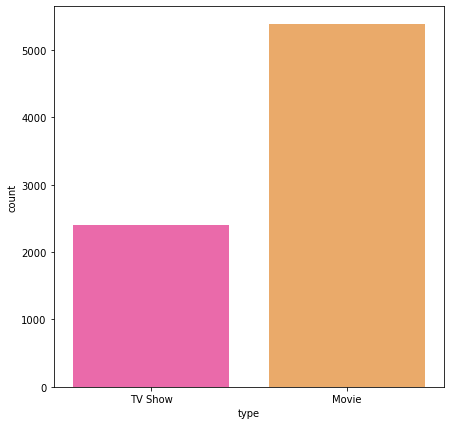

In [16]:
#beginning with the EDA
#countplot for tv Shows and movies
plt.figure(figsize = (7, 7))
sns.countplot(x = df2['type'], palette = 'spring')
plt.show()

HERE, WE CAN SEE THAT NETFLIX CONTAINS MORE CONTENT IN MOVIES THAN THE TV SHOWS.

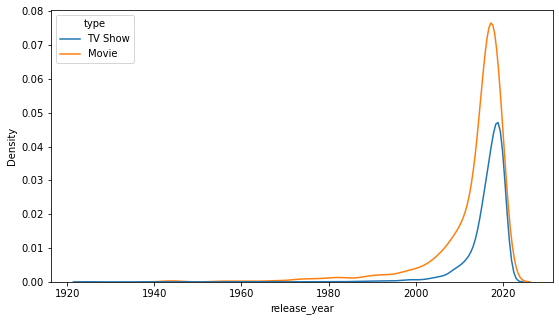

In [17]:
## PLOT FOR MAXIMUM RELEASE ACCORDING TO YEAR.
plt.figure(figsize = (9, 5))

sns.kdeplot(data = df2, x = df2['release_year'], hue = df['type'])
plt.show()

IN THIS, YEARS BETWEEN 2015 - 2020 SEEMS TO HAVE A MAXIMUM NUMBER OF RELEASE.
- THIS ALSO GIVES AN ADDITIONAL INSIGHT THAT, NETFLIX HAS SHOWN INTEREST IN TV SHOWS, WHICH WE CAN SEE IT SLIGHTLY INCREASING AROUND YEAR *2018 - 2020* . THOUGH IT DOES HAVE GREATER AMOUNT OF CONTENT IN MOVIES, ALSO SUBTLE AMOUNT IN TV SHOWS.

In [18]:
# top 20 COUNTRIES
df2['country'] = df2['country'].apply(lambda x: x.split(",")[0])
countries = df['country'].value_counts().head(20) #these are the top 20 countries which has 

C:\Users\Zoe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


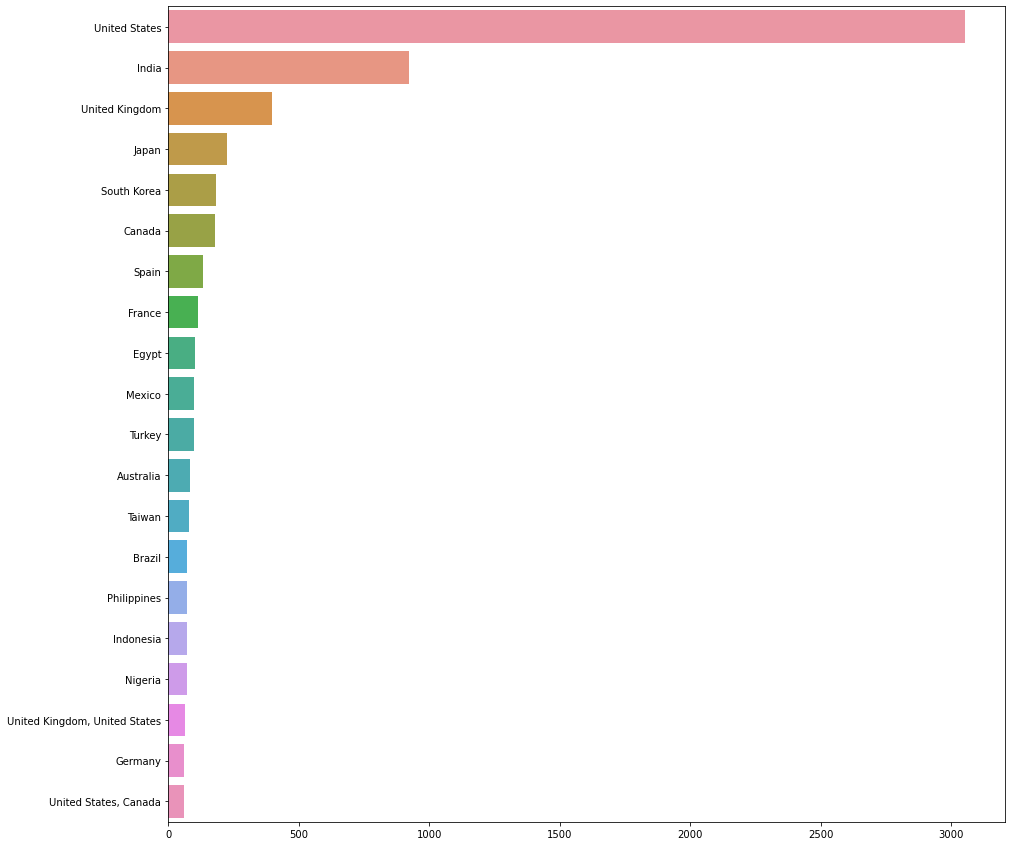

In [19]:
# top 20 COUNTRIES
df2['country'] = df2['country'].apply(lambda x: x.split(",")[0])
countries = df['country'].value_counts().head(20) #these are the top 20 countries which has 

#countries with maximum content
plt.figure(figsize = (15, 15))
sns.barplot(countries.values, countries.index )
plt.show()

UNITED STATES SEEMS TO HAVE MORE CONTENTS FOLLOWED BY INDIA, UNITED KINGDOM.

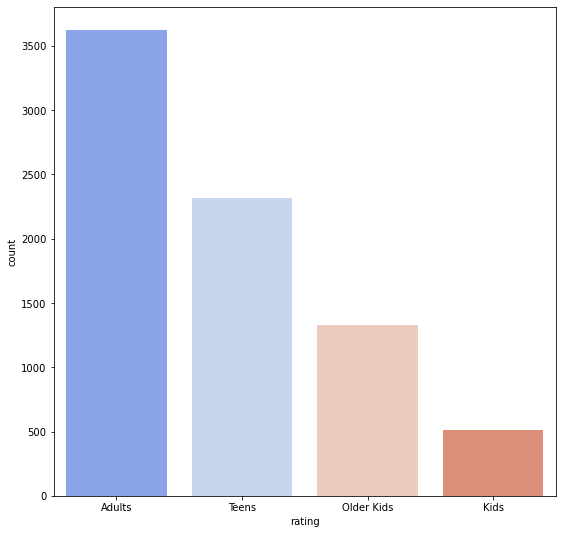

In [20]:
#types of contents
plt.figure(figsize = (9, 9))
sns.countplot(x = df2['rating'], palette = 'coolwarm')
plt.show()

*'ADULTS'* SEEMS TO BE UTMOST FOLLOWED BY *'TEENS'* AND *'OLDER KIDS'*.

<AxesSubplot:title={'center':'countries with highest "OLDER KIDS RATINGS" '}>

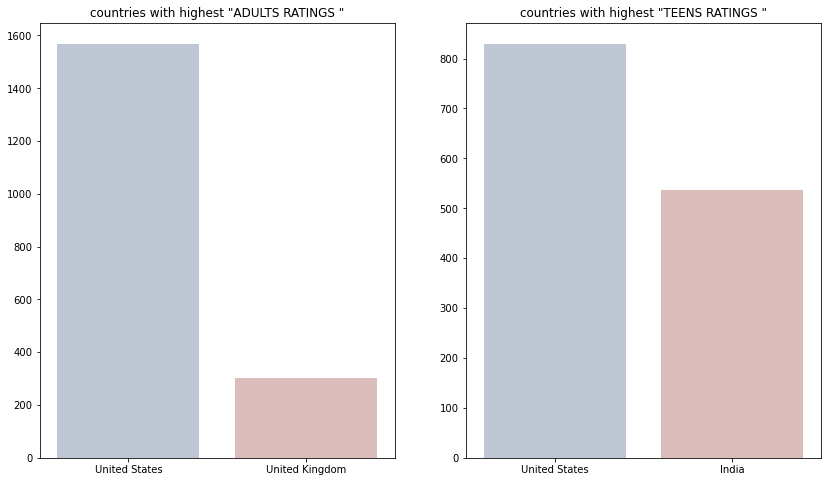

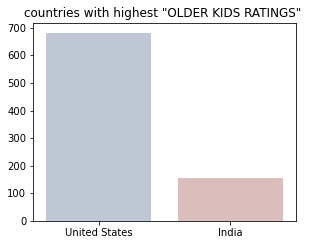

In [21]:
plt.figure(figsize = (14, 8))
plt.subplot(1, 2, 1)
e = df2[df2['rating']== 'Adults']['country'].value_counts().head(2)
sns.barplot(x =e.index, y= e.values, palette = 'vlag')
plt.title('countries with highest "ADULTS RATINGS \"')


plt.subplot(1, 2, 2)
f = df2[df2['rating']== 'Teens']['country'].value_counts().head(2)
plt.title('countries with highest "TEENS RATINGS \"')
sns.barplot(x = f.index, y =f.values,  palette = 'vlag')

plt.figure(figsize = (16, 8))
plt.subplot(2, 3, 3 )
g = df2[df2['rating']== 'Older Kids']['country'].value_counts().head(2)
plt.title('countries with highest "OLDER KIDS RATINGS\" ')

sns.barplot(x = g.index,y = g.values,  palette = 'vlag')


THESE ARE THE FOLLOWING COUNTRIES WITH DIFFERENT HIGHEST RATED CONTENT.


<AxesSubplot:>

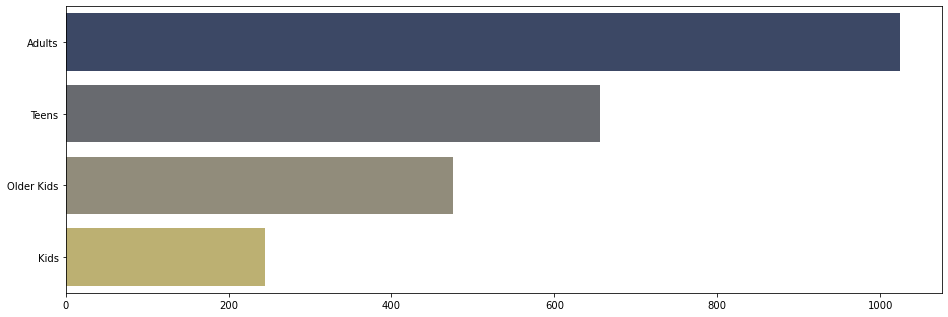

In [22]:
#ANALYSIS OF TV SHOWS BASED ON RATINGS 
h = df2[df2['type'] == 'TV Show']['rating'].value_counts()
h
a4_dims = (15.7, 5.27)
plt.figure(figsize= (a4_dims))
sns.barplot(x = h.values, y = h.index, orient = "h", palette = 'cividis')

TV SHOWS ARE MAXIMALLY RATED WITH 'ADULT' FOLLOWED BY ' TEENS' AND 'OLDER KIDS'

<AxesSubplot:>

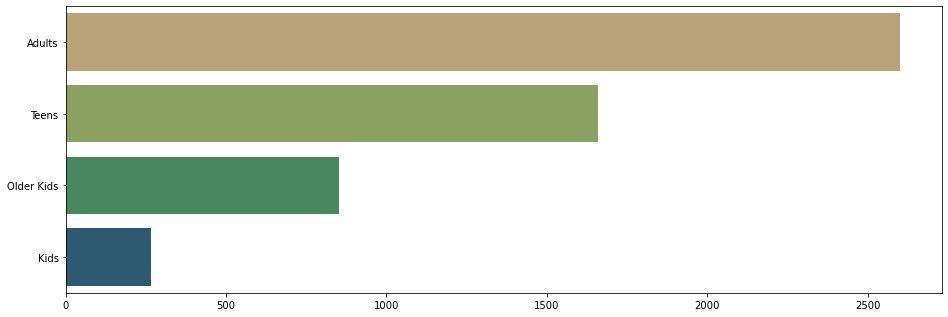

In [23]:
#MOVIES ANALYSIS BASED ON RATINGS
h = df2[df2['type'] == 'Movie']['rating'].value_counts()
h
a4_dims = (15.7, 5.27)
plt.figure(figsize= (a4_dims))
sns.barplot(x = h.values, y = h.index, orient = "h", palette = 'gist_earth_r')

HERE ALSO, THE MOVIES ARE RATED WITH 'ADULTS' FOLLOWED BY ' TEENS' AND 'OLDER KIDS'

In [24]:
#Analysis based on genres
df2['listed_in'] = df2['listed_in'].apply(lambda x: x.split(",")[0])
df2['listed_in'].value_counts() #these are the genres.

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Classic & Cult TV                 19
Anime Features                    19
Music & Musicals                  17
T

Dramas                      1384
Comedies                    1074
Documentaries                751
Action & Adventure           721
International TV Shows       689
Children & Family Movies     502
Crime TV Shows               369
Kids' TV                     357
Stand-Up Comedy              321
Horror Movies                244
Name: listed_in, dtype: int64

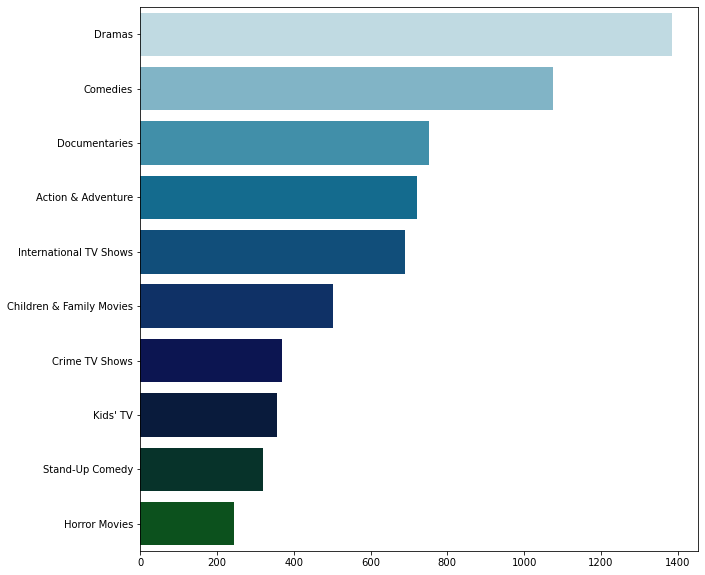

In [25]:
#top 10 genres which have more content
genres = df2['listed_in'].value_counts().head(10)
plt.figure(figsize = (10, 10))
sns.barplot(x = genres.values,y = genres.index, palette = 'ocean_r')
genres

- THESE ARE THE TOP 10 GENRES WHICH IS WIDELY AVAILABLE.
- NETFIX HAS A MERELY GOOD COLLECTIONS IN DRAMAS , FOLLOWED BY COMEDIES AND DOCUMENTRIES.

Dramas                      1384
Comedies                    1074
Documentaries                751
Action & Adventure           721
International TV Shows       689
Children & Family Movies     502
Crime TV Shows               369
Kids' TV                     357
Stand-Up Comedy              321
Horror Movies                244
Name: listed_in, dtype: int64

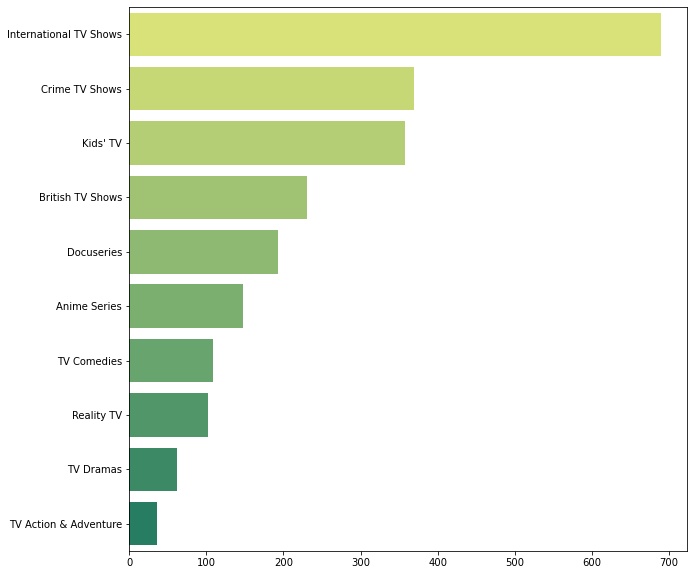

In [26]:
#GENRES BASED ON TV SHOWS
h = df2[df2['type'] == 'TV Show']['listed_in'].value_counts().head(10)
plt.figure(figsize = (10, 10))
sns.barplot(x = h.values,y = h.index, palette = 'summer_r')
genres

THERE ARE MAXIMALLY *' INTERNATION TV SHOWS '* ARE AVAILABLE ACCOMPANIED BY  *'CRIME TV SHOWS '*  AND *' KIDS TV SHOWS'*

Dramas                      1384
Comedies                    1074
Documentaries                751
Action & Adventure           721
International TV Shows       689
Children & Family Movies     502
Crime TV Shows               369
Kids' TV                     357
Stand-Up Comedy              321
Horror Movies                244
Name: listed_in, dtype: int64

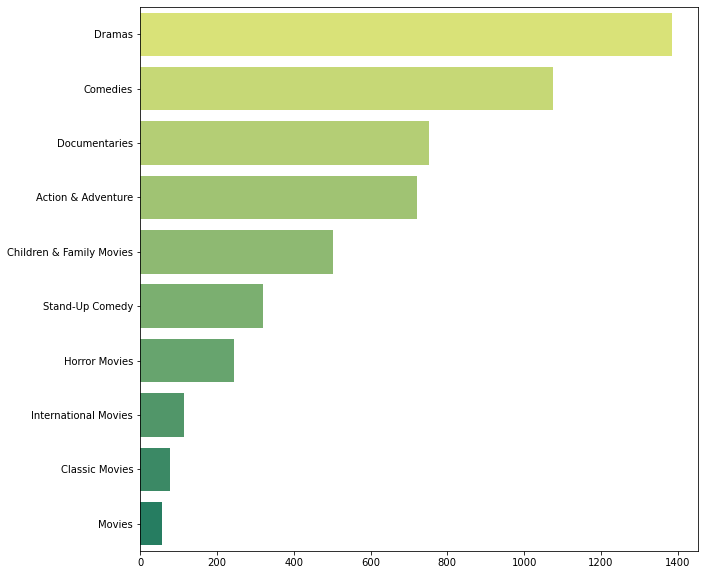

In [27]:
#MOVIES BASED ON GENRES
h = df2[df2['type'] == 'Movie']['listed_in'].value_counts().head(10)
plt.figure(figsize = (10, 10))
sns.barplot(x = h.values,y = h.index, palette = 'summer_r')
genres

MOVIES HIGHLY CONTAINS *'DRAMA'* GENRE ALONG WITH *'COMEDY'* AND *'DOCUMENTRIES'*

In [28]:
#countries with different genres
country_genre = df2[['country', 'listed_in']].value_counts().sort_values(ascending = False)
country_genre_df = pd.DataFrame(country_genre)
country_genre_df.reset_index(level = ['country', 'listed_in'], inplace = True)# resetting index
country_genre_df.rename(columns = {0:'counts'}, inplace = True)
country_genre_df.iloc[2:20]

,country,listed_in,counts
2,India,Dramas,382
3,United States,Comedies,354
4,United States,Children & Family Movies,343
5,United States,Action & Adventure,260
6,India,Comedies,254
7,United States,Stand-Up Comedy,235
8,United States,Kids' TV,224
9,United Kingdom,British TV Shows,205
10,United States,Docuseries,145
11,United States,Crime TV Shows,140


AS IS WELL KNOWN THAT, 
- UNITED STATES
- INDIA
- UNITED KINGDOM 
- JAPAN
- SOUTH KOREA


THESE ARE THE TOP 5 COUNTRIES WHICH CONTAINS MORE CONTENT. WE ARE GOING TO WITNESS WHAT DIFFERENT KIND OF CONTENT THEY HAVE.

<AxesSubplot:xlabel='counts', ylabel='listed_in'>

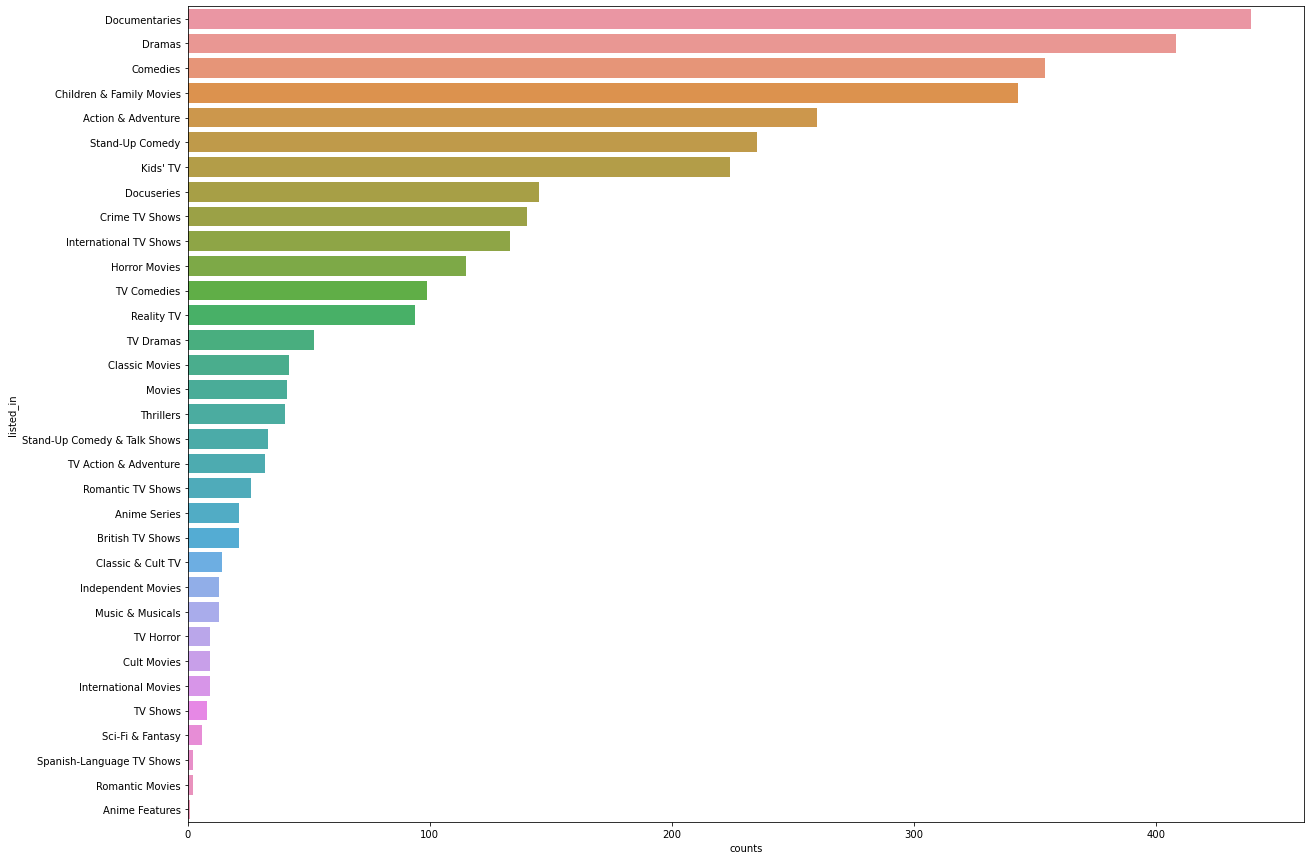

In [29]:
#united_states
plt.figure(figsize = (20, 15))
e = country_genre_df.groupby(['country'])
f = e.get_group('United States')
sns.barplot(x = f['counts'], y = f['listed_in'])

HERE WE CAN SEE THAT , UNITED STATES GOT LOT OF CONTENTS IN *DOCUMENTRIES* , *DRAMAS* , *COMEDIES*

<AxesSubplot:xlabel='counts', ylabel='listed_in'>

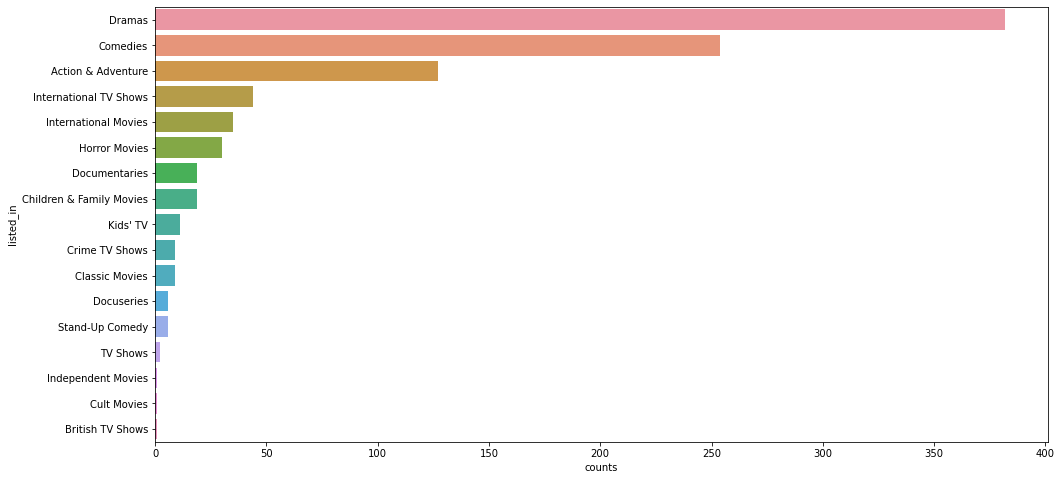

In [30]:
#INDIA
plt.figure(figsize = (16, 8))
f = e.get_group('India')
sns.barplot(x = f['counts'], y = f['listed_in'])

INDIA HAS VAST CONTETNT IN *DRAMAS* FOLLOWED BY *COMEDIES*, *ACTION & ADVENTURE*.

<AxesSubplot:xlabel='counts', ylabel='listed_in'>

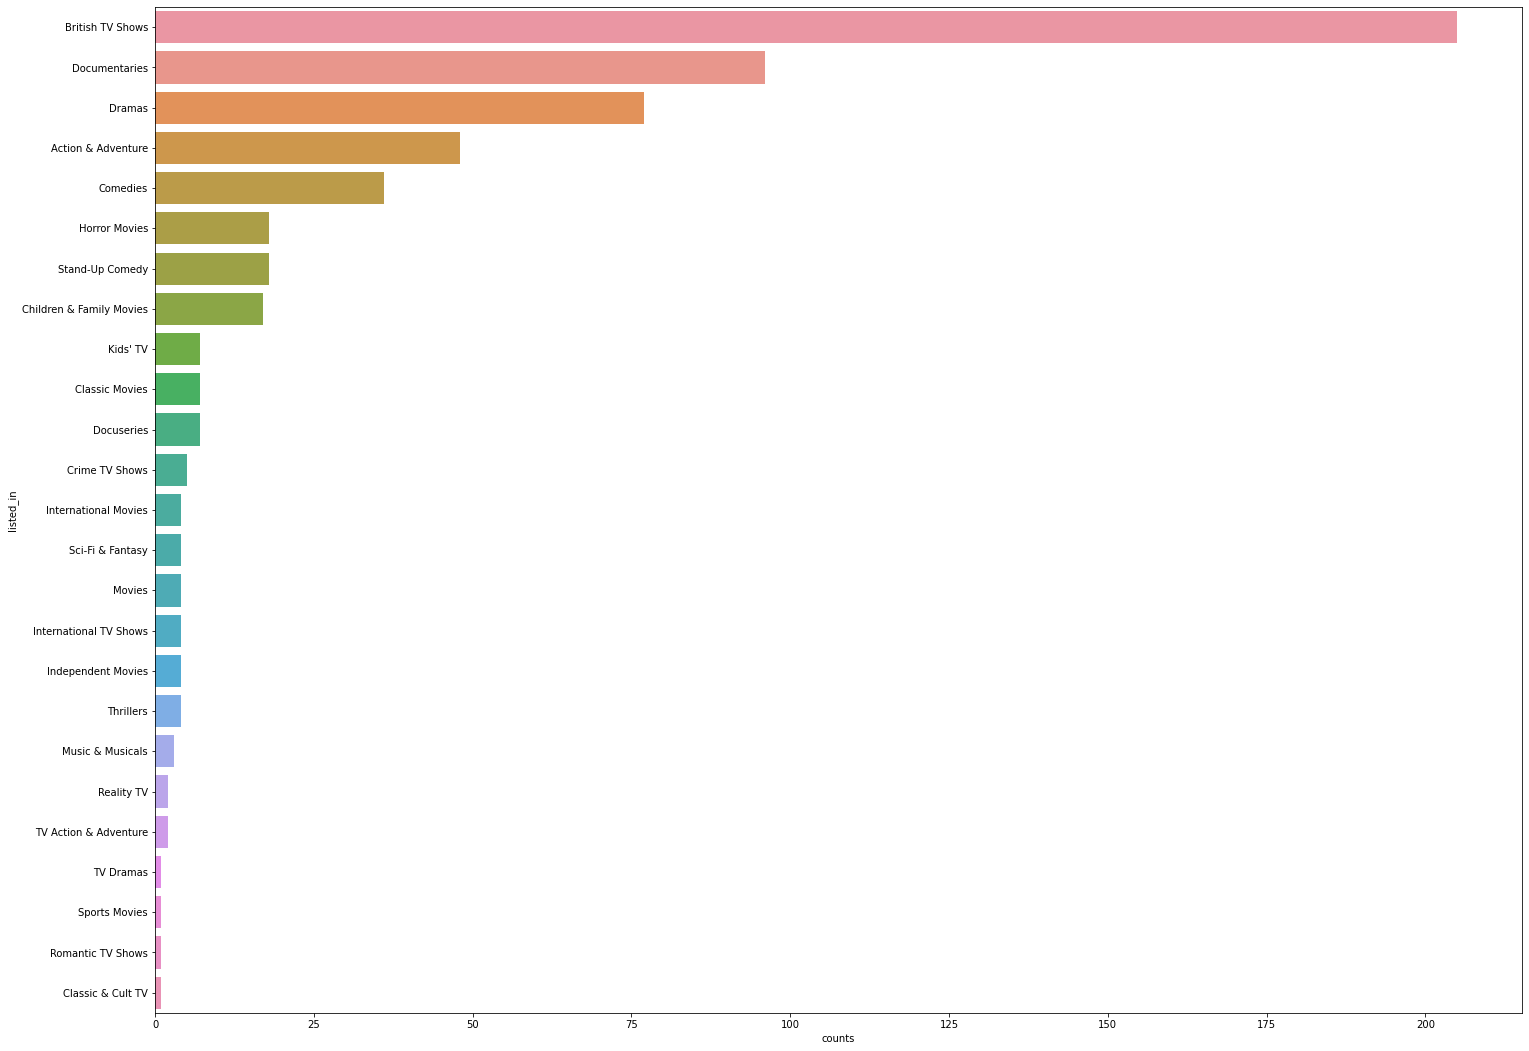

In [31]:
#UNITED KINGDOM
plt.figure(figsize = (24.5, 18.5))
f = e.get_group('United Kingdom')
sns.barplot(x = f['counts'], y = f['listed_in'])

UNITED KINGDOM HAS RICH CONTENT IN *BRITISH TV SHOWS*, ALSO THEY HAVE SUBTLE CONTENT IN *DOCUMENTRIES* AND *DRAMAS*

<AxesSubplot:xlabel='counts', ylabel='listed_in'>

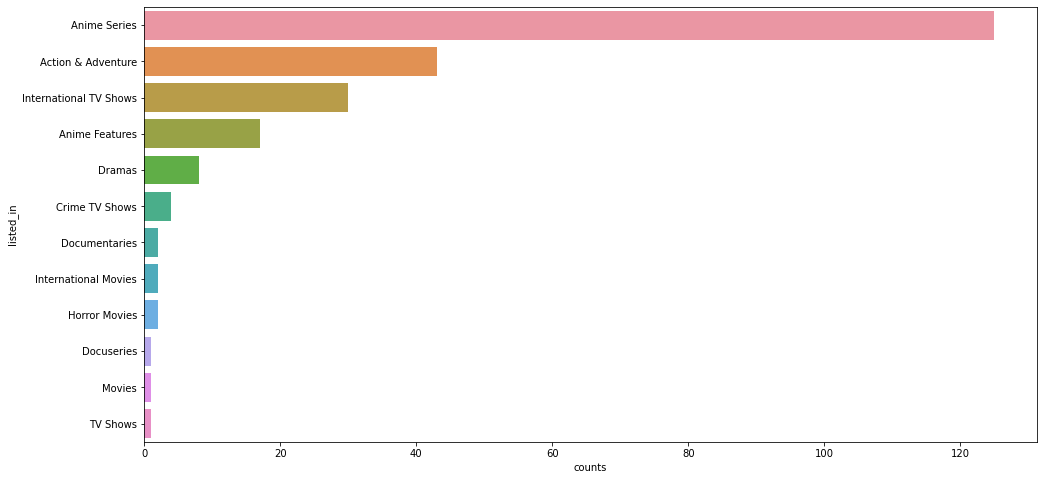

In [32]:
#JAPAN
plt.figure(figsize = (16, 8))
f = e.get_group('Japan')
sns.barplot(x = f['counts'], y = f['listed_in'])

 *ANIME SERIES* IS THE TOPMOST CONTENT IN JAPAN, WHICH IS WIDELY KNOWN. THEY ALSO CONTAIN FINE CONTENTS IN *ACTION & ADVENTURE*, *INTERNATIONAL TV SHOWS *. 

<AxesSubplot:xlabel='counts', ylabel='listed_in'>

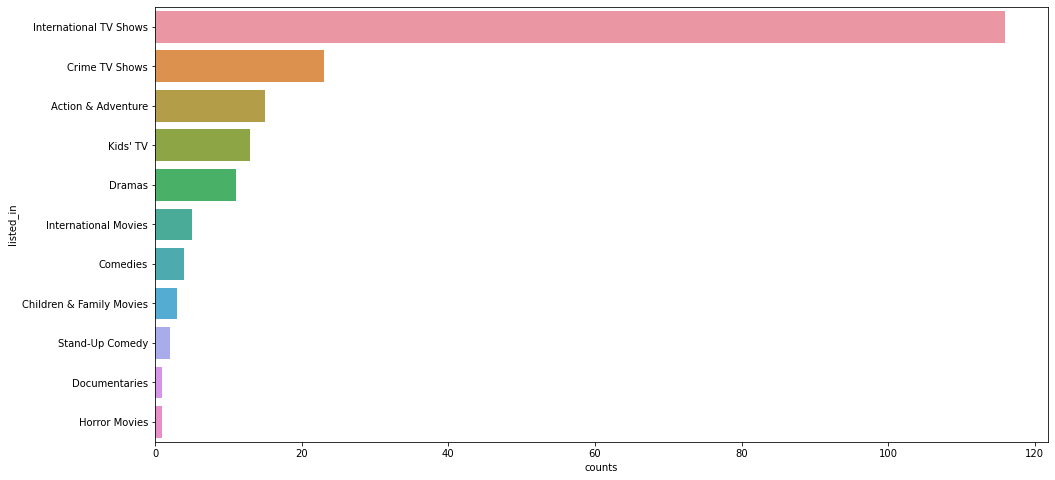

In [33]:
#SOUTH KOREA
plt.figure(figsize = (16, 8))
f = e.get_group('South Korea')
sns.barplot(x = f['counts'], y = f['listed_in'])

SOUTH KOREA HAS MAXIMAL CONTENT IN *INTERNATIONAL TV SHOWS* WHICH IS ACCOMPANIED BY *CRIME TV SHOWS*

<AxesSubplot:title={'center':'genres with highest "OLDER KIDS RATINGS" '}>

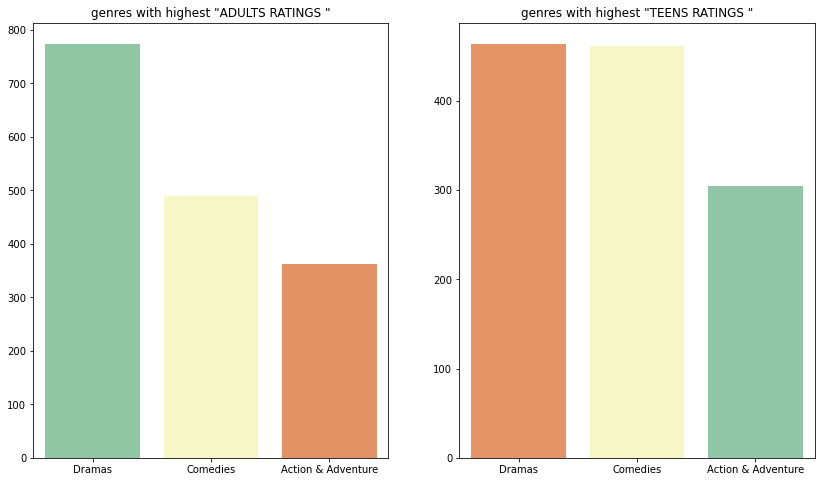

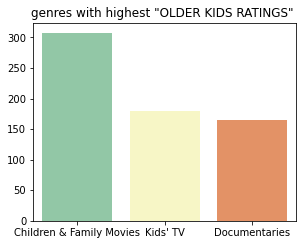

In [34]:
#GENRES BASED ON RATINGS, TOP 3

plt.figure(figsize = (14, 8))
plt.subplot(1, 2, 1)
e = df2[df2['rating']== 'Adults']['listed_in'].value_counts().head(3)
sns.barplot(x =e.index, y= e.values, palette = 'Spectral_r')
plt.title('genres with highest "ADULTS RATINGS \"')


plt.subplot(1, 2, 2)
f = df2[df2['rating']== 'Teens']['listed_in'].value_counts().head(3)
plt.title('genres with highest "TEENS RATINGS \"')
sns.barplot(x = f.index, y =f.values,  palette = 'Spectral')

plt.figure(figsize = (16, 8))
plt.subplot(2, 3, 3 )
g = df2[df2['rating']== 'Older Kids']['listed_in'].value_counts().head(3)
plt.title('genres with highest "OLDER KIDS RATINGS\" ')

sns.barplot(x = g.index,y = g.values,  palette = 'Spectral_r')

THESE ARE THE TOP THREE GENRES WHICH IS HIGHLY RATED.

In [35]:
#GENRES RELEASE PER YEAR
df3 = df2.copy()
df4 = df3[['release_year','listed_in']].value_counts().sort_values(ascending = False).head(31)
df5 = pd.DataFrame(df4)
df5.reset_index(level = ['release_year', 'listed_in'], inplace = True)# resetting index


In [36]:
df5.head()

,release_year,listed_in,0
0,2018,Dramas,199
1,2017,Dramas,190
2,2016,Dramas,184
3,2017,Documentaries,165
4,2019,Dramas,148


- AS I MENTIONED ABOVED, THE NUMBER OF RELEASE WAS GRADULLAY INCREASED IN PAST FIVE YEARS. 
- WE ARE GOING TO HAVE A GLANCE ON SOME POPULAR GENRES WHICH WERE RELEASE IN IN THOSE FOLLOWING YEARS.

In [37]:
df5['listed_in'].value_counts()

Comedies                    6
Dramas                      6
Documentaries               5
International TV Shows      5
Crime TV Shows              3
Action & Adventure          3
Children & Family Movies    2
Kids' TV                    1
Name: listed_in, dtype: int64

Text(0.5, 1.0, 'COMEDY RELEASED PER YEAR')

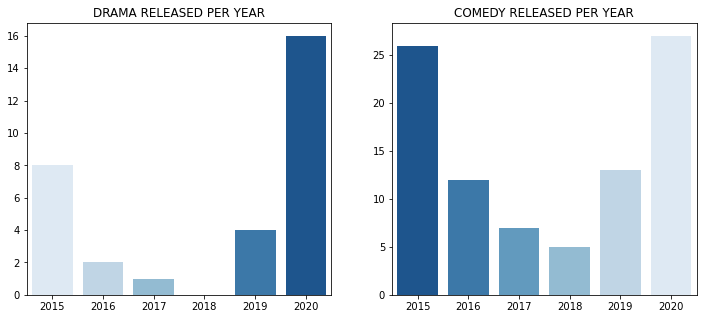

In [38]:
#DRAMA GENRES RELEASED IN FIVE YEARS
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
i = df5[df5['listed_in']== 'Dramas']['release_year']
sns.barplot(y = i.index, x = i.values, palette = 'Blues')
plt.title('DRAMA RELEASED PER YEAR')


plt.subplot(1, 2, 2)
i = df5[df5['listed_in']== 'Comedies']['release_year']
sns.barplot(y = i.index, x = i.values, palette = 'Blues_r')
plt.title('COMEDY RELEASED PER YEAR')



HERE, WE GET TO KNOW THAT DRAMA AND COMEDY WERE RELEASE MAXIMALLY IN *2015 - 2020* RESPECTIVIELY.

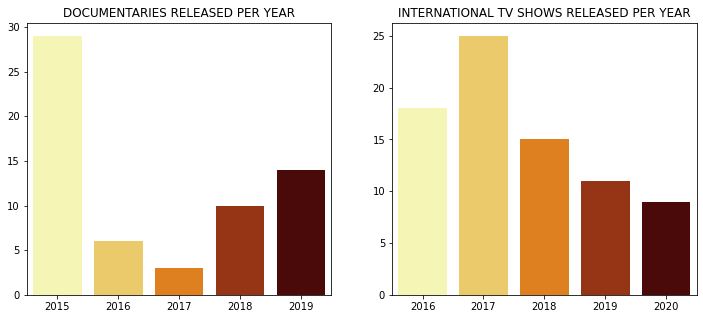

In [39]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
i = df5[df5['listed_in']== 'Documentaries']['release_year']
sns.barplot(y = i.index, x = i.values, palette = 'afmhot_r')
plt.title('DOCUMENTARIES RELEASED PER YEAR')

plt.subplot(1, 2, 2)
i = df5[df5['listed_in']== 'International TV Shows']['release_year']
sns.barplot(y = i.index, x = i.values, palette = 'afmhot_r')
plt.title('INTERNATIONAL TV SHOWS RELEASED PER YEAR')

plt.show()

- DOCUMETRIES WERE HIGLY RELASED IN 2015 AND ACCOMPANIED BY *2019* AND *2018*
- INTERNATIONAL TV SHOWS WERE MAXIMALLY RELEASED IN YEAR *2017* AND FOLLOWED BY *2016* AND *2018*

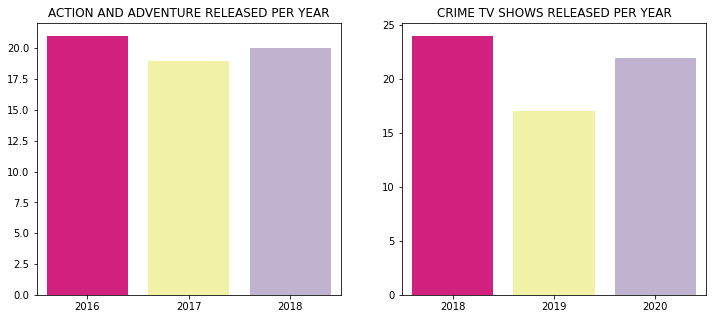

In [40]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
i = df5[df5['listed_in']== 'Action & Adventure']['release_year']
sns.barplot(y = i.index, x = i.values, palette='Accent_r')
plt.title('ACTION AND ADVENTURE RELEASED PER YEAR')

plt.subplot(1, 2, 2)
i = df5[df5['listed_in']== 'Crime TV Shows']['release_year']
sns.barplot(y = i.index, x = i.values, palette = 'Accent_r')
plt.title('CRIME TV SHOWS RELEASED PER YEAR')

plt.show()

    - FOR *ACTION AND ADVENTURE* WE CAN WITNESS THAT THEY WERE SUBTLY RELEASE IN THESE THREE YEARS.
    
    
     - *CRIME TV SHOWS* WERE PROFOUNDLY RELEASED IN YEAR *2018* ALONG WITH YEAR *2020*.

NETWORK ANALYSIS OF CAST AND DIRECTORS.

In [41]:
v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cast      7059 non-null   object
 1   director  5398 non-null   object
dtypes: object(2)
memory usage: 502.3+ KB


    - WE CAN SEE THAT IN  COLUMN *CAST* THERE ARE 718 MISSING VALUES, ALSO IN DIRECTOR's COLUMN 2379 VALUES ARE MISSING.
    - TO HANDLE THESE MISSING VALUES WILL BE ASSIGNING UNIQUE VALUES TO IT WHICH IS *UNKNOWN*.

In [42]:
v.fillna('Unknown', inplace = True)

C:\Users\Zoe\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [43]:
v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cast      7777 non-null   object
 1   director  7777 non-null   object
dtypes: object(2)
memory usage: 502.3+ KB


In [44]:
#creating new dataframe
v1 = df[['country', 'cast', 'director']].value_counts().sort_values(ascending = False)
v2 = pd.DataFrame(v1)
v2.reset_index(level = ['country', 'cast', 'director'], inplace = True)# resetting index
v2.rename(columns = {0:'counts'}, inplace = True)
v2['cast'] = v2['cast'].apply(lambda x: x.split(",")[0])
v2['director'] =  v2['director'].apply(lambda x: x.split(",")[0])
v2

,country,cast,director,counts
0,United States,Dave Chappelle,Stan Lathan,3
1,United States,Bill Burr,Jay Karas,3
2,United Kingdom,Rachael Stirling,Edward Cotterill,3
3,United States,Louis C.K.,Louis C.K.,3
4,United States,Sam Kinison,Walter C. Miller,3
...,...,...,...,...
4922,"United States, United Arab Emirates",Jimmy Bennett,Robert Rodriguez,1
4923,"United States, United Kingdom",Leonardo DiCaprio,Christopher Nolan,1
4924,"United States, United Kingdom",Leonardo DiCaprio,Sam Mendes,1
4925,"United States, United Kingdom",Samuel West,Louise Wardle,1


In [45]:
print("cast list :", "\n"* 2 , v2['cast'].value_counts().head(), "\n") #total count of cast, top 5
print("director list :" , "\n"* 2, v2['director'].value_counts().head(), "\n") #total count of director, top 5

cast list : 

 Shah Rukh Khan      27
Akshay Kumar        22
Adam Sandler        19
Amitabh Bachchan    18
Ajay Devgn          16
Name: cast, dtype: int64 

director list : 

 Raúl Campos            17
Marcus Raboy           15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Name: director, dtype: int64 



In [46]:
#installing wordclod
!pip install wordcloud


In [47]:
text = " ".join(name for name in v2.cast.astype(str)) #creating text list
print ("There are {} words in the combination of all cells in column v2.".format(len(text))) #checking how many words are present.

There are 68887 words in the combination of all cells in column v2.


In [48]:
text2 = " ".join(name for name in v2.director.astype(str)) #creating text list
print ("There are {} words in the combination of all cells in director v2.".format(len(text2))) #checking how many words are present.

There are 70707 words in the combination of all cells in director v2.


# DIRECTORS ANALAYSIS

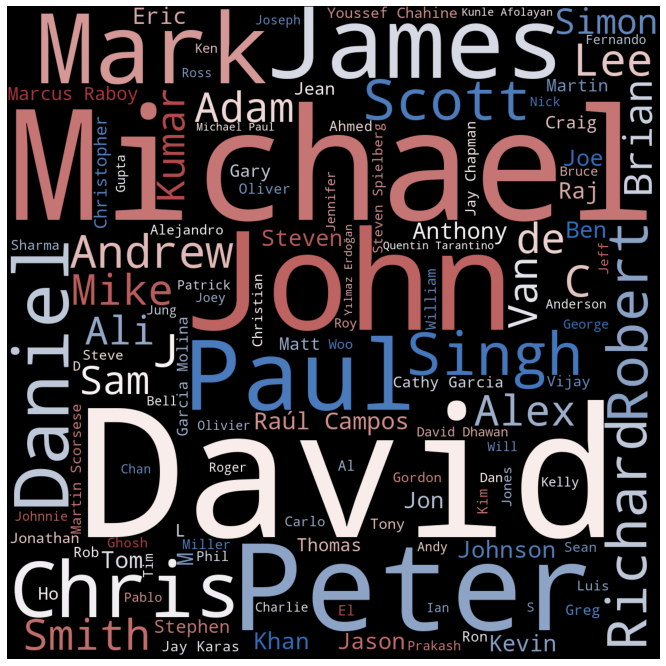

In [49]:
#director
from wordcloud import WordCloud , STOPWORDS
plt.rcParams['figure.figsize'] = (12,12)

wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text2)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


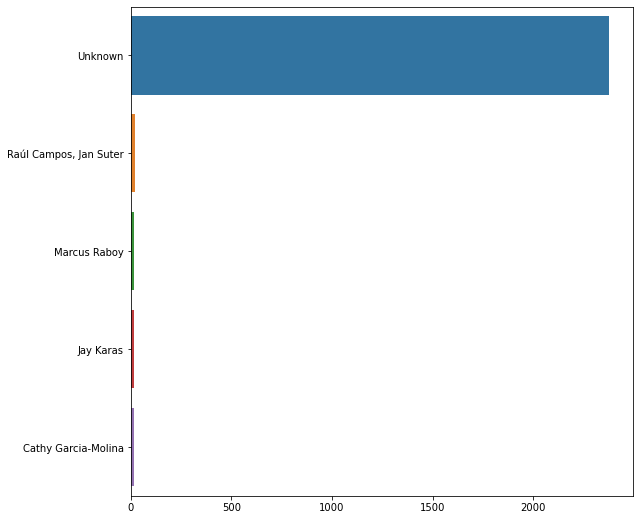

In [50]:
plt.figure(figsize = (9, 9))
x = v['director'].value_counts().head()
sns.barplot(x= x.values, y = x.index)
plt.show()

<AxesSubplot:title={'center':' director Martin scorsese'}>

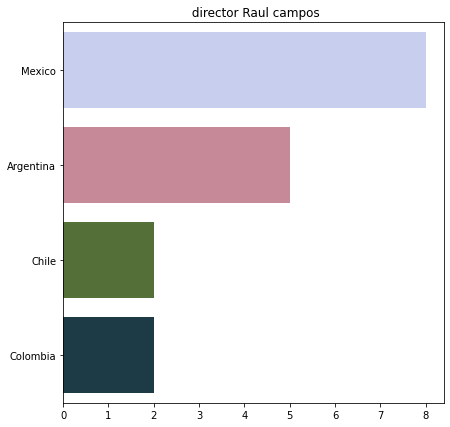

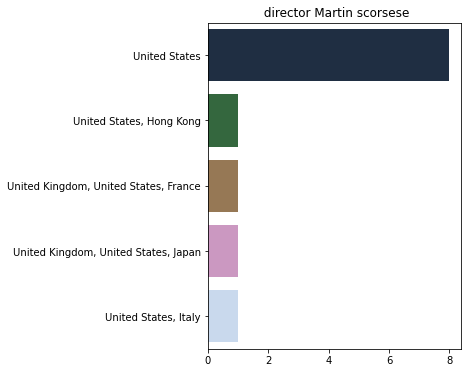

In [51]:

plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)
e = v2.groupby('director')
f = e.get_group('Raúl Campos')
g = f['country'].value_counts()
plt.title(' director Raul campos')
sns.barplot(y = g.index, x = g.values, palette= 'cubehelix_r')#countries in which these directors have content

#'Marcus Raboy') #'Jay Karas', 'Cathy Garcia-Monalina



#Marcus raboy
plt.figure(figsize = (10,6 ))
plt.subplot(1, 2, 1)

f = e.get_group('Martin Scorsese')
g = f['country'].value_counts()
plt.title(' director Martin scorsese')
sns.barplot(y = g.index, x = g.values, palette = 'cubehelix')


    - DIRECTOR RAUL CAMPOS's CONTENTS ARE SUBTLY AVAILABLE IN MEXICO FOLLOWD BY ARGENTINA.  


    - DIRECTOR MARTIN SCORSESE's CONTENTS ARE HIGHLY AVAILABLE IN UNITED STATES.


    - ONLY THESE DIRECTOR'S CONTENT ARE AVAILABLE IN DIFFERENT COUNTRIES.


    - DIRECTOR *Cathy Garcia-Molina's* CONTENTS ARE AVALIBLE IN *PHILIPPINES*


    - *JAY KARAS* AND *MARCO RABOY* CONTENTS ARE AVAILBLE IN UNITED STATES.

# CAST ANALYSIS

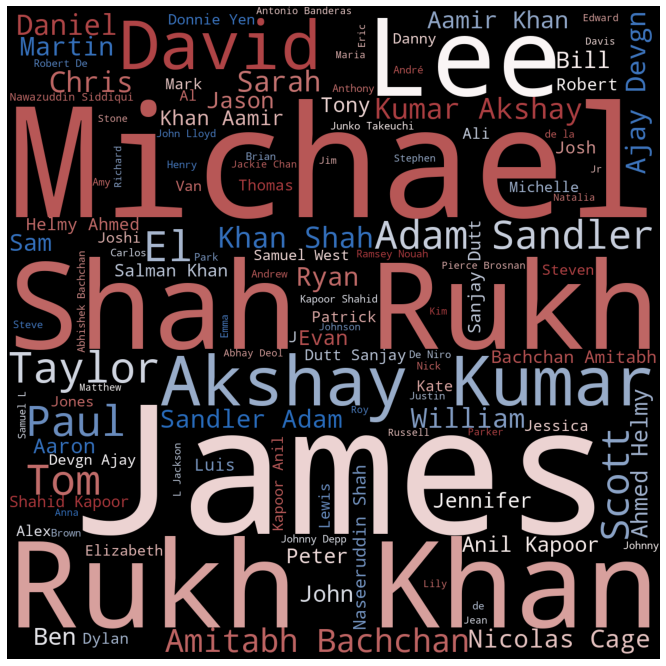

In [52]:
#cast
from wordcloud import WordCloud, STOPWORDS
plt.rcParams['figure.figsize'] = (12,12)

wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


<AxesSubplot:xlabel='counts', ylabel='cast'>

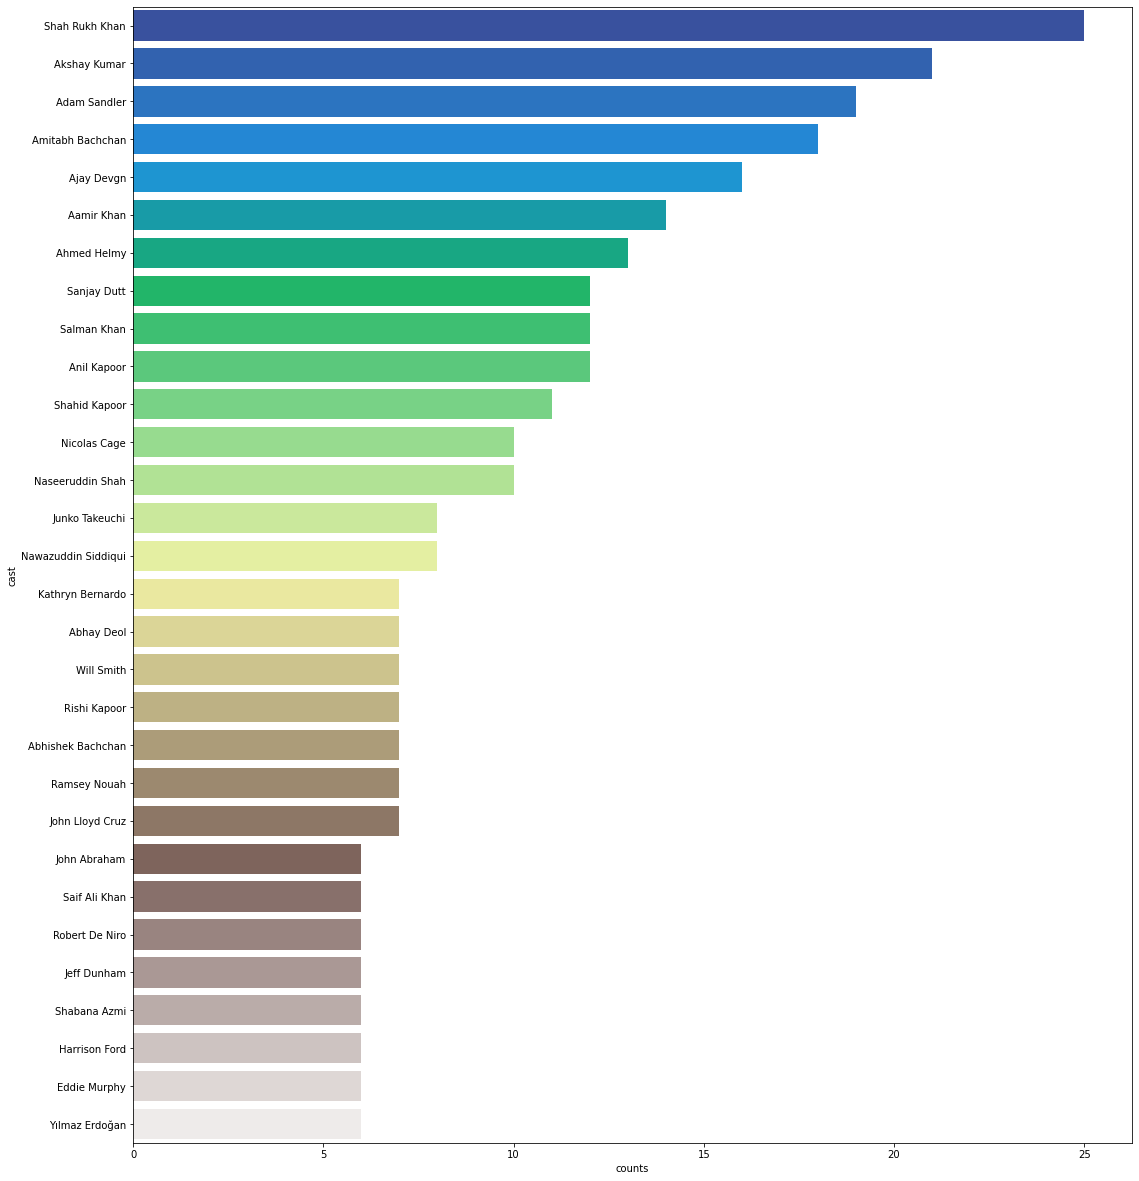

In [53]:
v3= v2[['country', 'cast']].value_counts().head(100)
v4 = pd.DataFrame(v3)
v4.reset_index(level = ['country', 'cast'], inplace = True)# resetting index
v4.rename(columns = {0:'counts'}, inplace = True)
v4
plt.figure(figsize = (17.9, 20.9))
sns.barplot(x = v4['counts'].head(30), y = v4['cast'].head(30), palette = 'terrain')


    - THESE ARE THE TOP 30 CELEBRITITES WHO HAS A GOOD AMOUNT OF CONTENT AVALIBLE.
    - SHAH RUKH KHAN , AKSHAY KUMAR AND ADAM SANDLER ARE THE TOP THREE CELEBRITITES WHOSE CONTENTS ARE HIGLY AVAILBLE.

array([<AxesSubplot:ylabel='country'>], dtype=object)

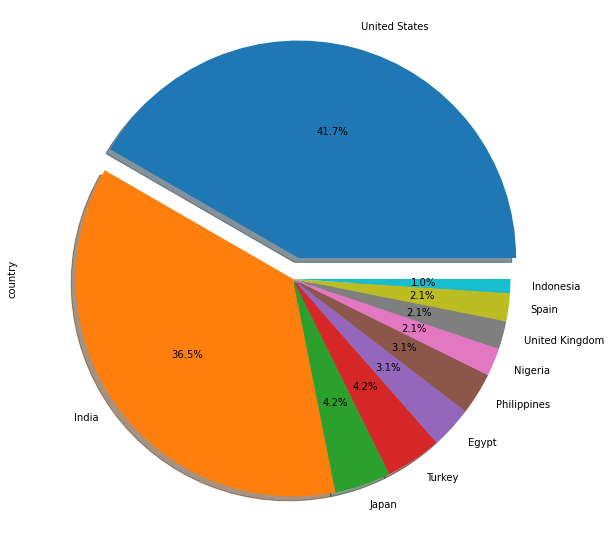

In [54]:
#countries from which these celebrities belong.
#plt.figure(figsize = (9, 9))
v5 = v4['country'].value_counts().head(10)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
v5.plot.pie(subplots=True, figsize=(17, 10),explode = explode,  labels = v5.index, autopct='%1.1f%%', shadow = True )

    MAXIMUM NUMBER OF CELEBRITIES BELONGED FROM *UNITED STATES* AND *INDIA*.

<AxesSubplot:xlabel='counts', ylabel='cast'>

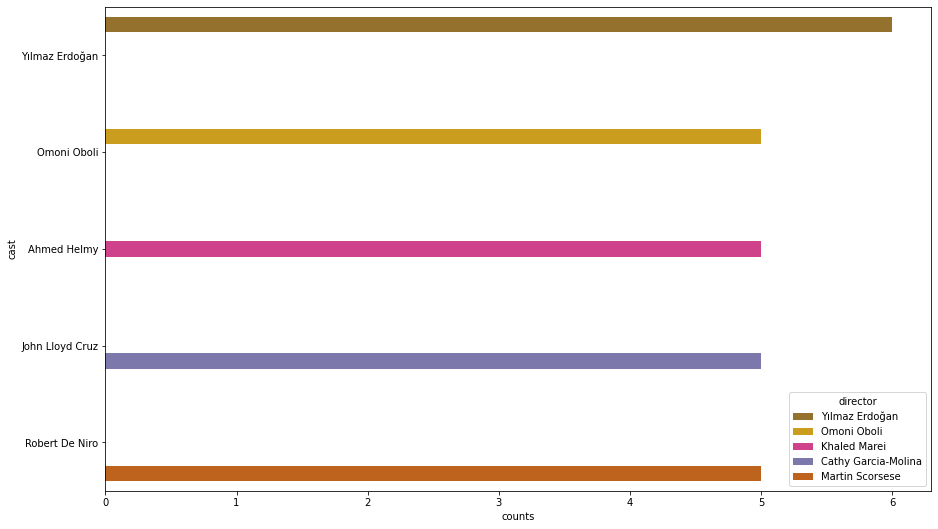

In [55]:
#CAST AND THE DIRECTORS
v6 = v2[['cast', 'director']].value_counts().head(50)
v7 = pd.DataFrame(v6)
v7.reset_index(level = ['cast', 'director'], inplace = True)# resetting index
v7.rename(columns = {0:'counts'}, inplace = True)
v7
plt.figure(figsize = (14.8, 8.9))

sns.barplot(x = v7['counts'].head(5), y = v7['cast'].head(5), hue = v7['director'].head(5),palette = 'Dark2_r')

    THESE ARE THE TOP 5 CELEBRITITES WHO WORKED FREQUENTLY WITH THESE FOLLOWING DIRECTORS.

THESE ARE A COUPLE OF INSIGHTS, EXTRACTED FROM THIS DATASET RESPECTIVELY. THANK YOU.